In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install pandas_datareader
from pandas_datareader.data import DataReader
from datetime import datetime

In [23]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [24]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
for stock in tech_list:   
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [25]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

In [26]:
df = pd.concat(company_list, axis=0)

In [30]:
df.groupby('company_name').size()

company_name
AMAZON       253
APPLE        253
GOOGLE       253
MICROSOFT    253
dtype: int64

In [31]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,118.355415,115.289950,116.931394,116.849249,1.274200e+08,116.423061
std,15.880357,15.498153,15.823144,15.659308,5.273157e+07,15.763739
min,79.677498,78.272499,78.942497,79.182503,4.669130e+07,78.652542
25%,112.860001,109.160004,111.620003,111.199997,8.994600e+07,110.654892
50%,121.989998,118.919998,120.360001,120.589996,1.124244e+08,120.287437
75%,129.720001,126.760002,128.500000,127.900002,1.531980e+08,127.683121
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


In [32]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-05-21 to 2021-05-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          253 non-null    float64
 1   Low           253 non-null    float64
 2   Open          253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    float64
 5   Adj Close     253 non-null    float64
 6   company_name  253 non-null    object 
dtypes: float64(6), object(1)
memory usage: 14.8+ KB


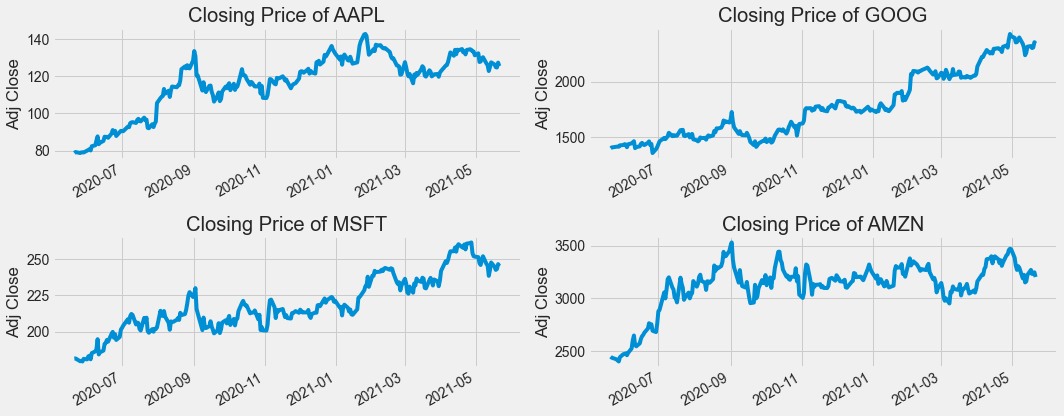

In [40]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

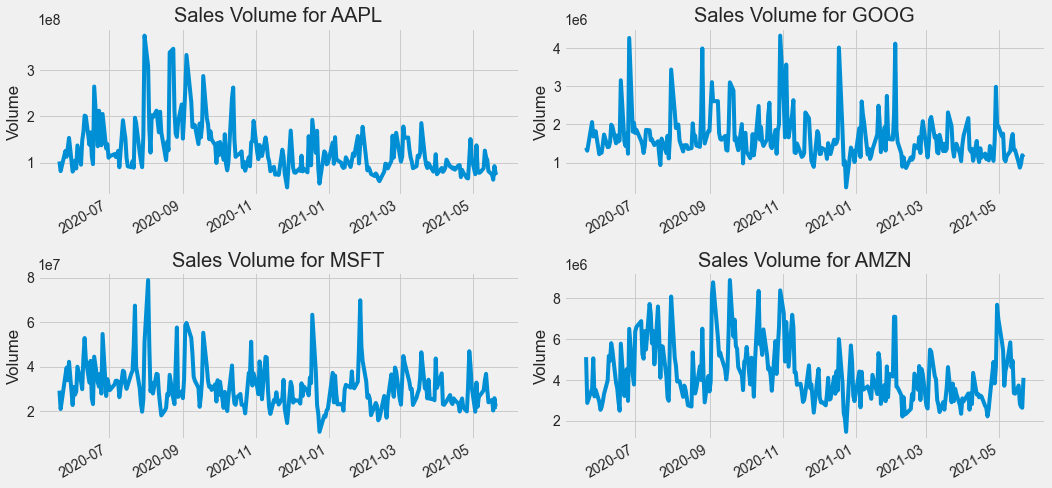

In [41]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [42]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

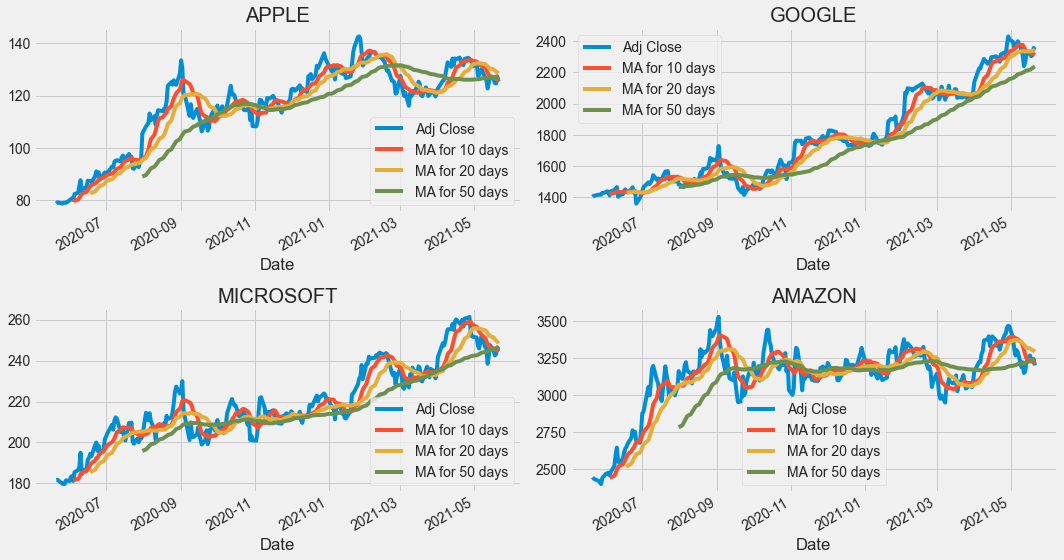

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

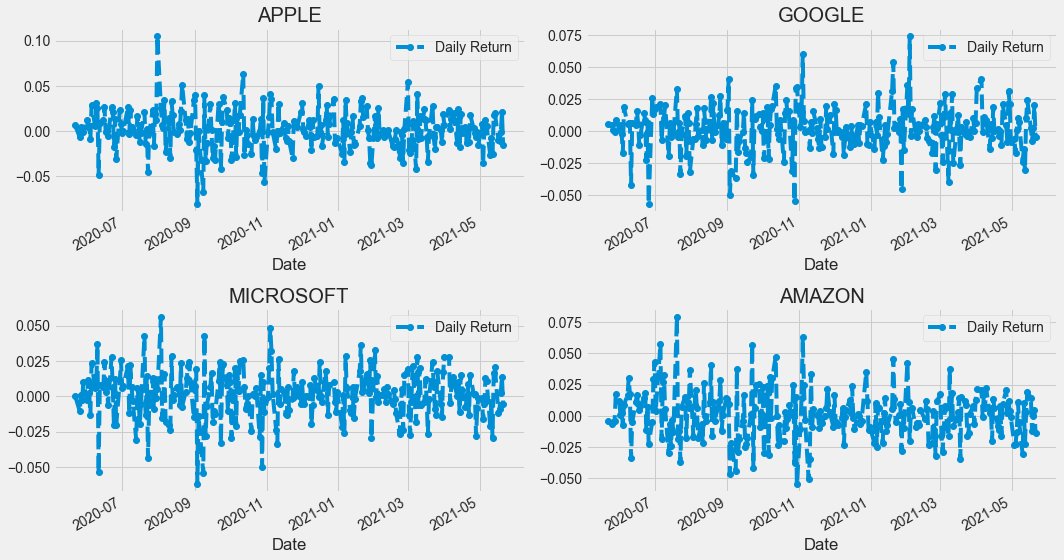

In [46]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

c:\users\home\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\home\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\home\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

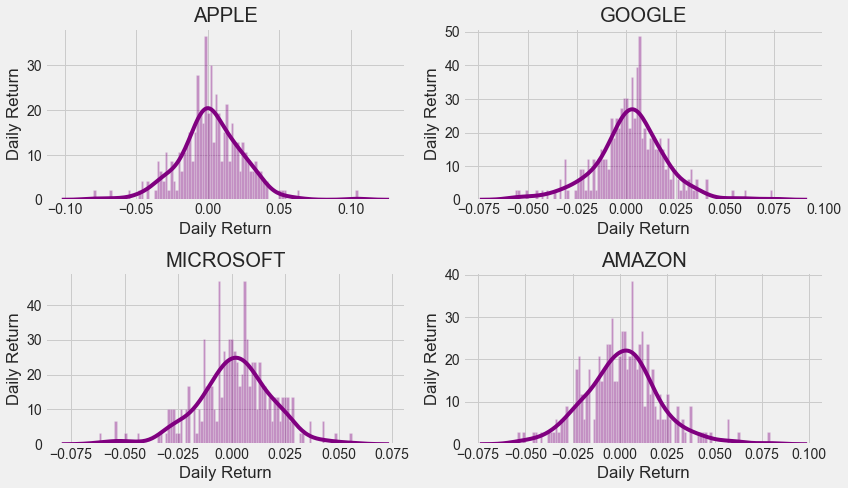

In [54]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'], bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()

In [56]:
AAPL.corr()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
High,1.000000,0.994790,0.997081,0.995944,-0.188365,0.995823,0.966517,0.910731,0.590967,-0.067079
Low,0.994790,1.000000,0.995042,0.995966,-0.255886,0.996127,0.962028,0.903329,0.614039,-0.056916
Open,0.997081,0.995042,1.000000,0.991841,-0.210226,0.991850,0.965540,0.908002,0.595718,-0.107318
Close,0.995944,0.995966,0.991841,1.000000,-0.224102,0.999956,0.960345,0.902499,0.594432,-0.004014
Volume,-0.188365,-0.255886,-0.210226,-0.224102,1.000000,-0.228102,-0.314717,-0.341468,-0.592900,0.039325
Adj Close,0.995823,0.996127,0.991850,0.999956,-0.228102,1.000000,0.961468,0.905196,0.605673,-0.005602
MA for 10 days,0.966517,0.962028,0.965540,0.960345,-0.314717,0.961468,1.000000,0.975722,0.761562,-0.145302
MA for 20 days,0.910731,0.903329,0.908002,0.902499,-0.341468,0.905196,0.975722,1.000000,0.875860,-0.135650
MA for 50 days,0.590967,0.614039,0.595718,0.594432,-0.592900,0.605673,0.761562,0.875860,1.000000,-0.147315
Daily Return,-0.067079,-0.056916,-0.107318,-0.004014,0.039325,-0.005602,-0.145302,-0.135650,-0.147315,1.000000


In [57]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-21,78.682327,1402.800049,181.670944,2446.739990
2020-05-22,79.188927,1410.420044,181.750183,2436.879883
2020-05-26,78.652542,1417.020020,179.828796,2421.860107
2020-05-27,78.995224,1417.839966,180.066498,2410.389893
2020-05-28,79.029984,1416.729980,179.660416,2401.100098


In [59]:
tech_rets = closing_df.pct_change()
tech_rets.tail()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-05-17,-0.009259,0.002267,-0.011969,0.014735
2021-05-18,-0.011246,-0.007745,-0.008565,-0.011653
2021-05-19,-0.001282,0.002292,0.002474,-0.000148
2021-05-20,0.021012,0.020522,0.013820,0.004914
2021-05-21,-0.014767,-0.004665,-0.005315,-0.013733


c:\users\home\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


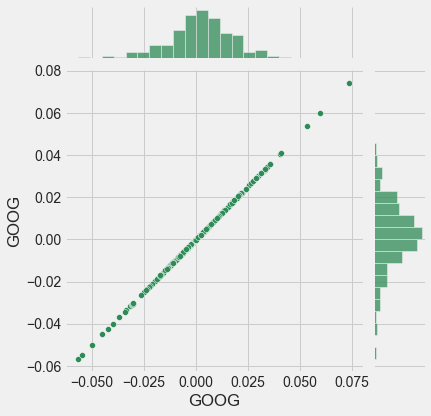

In [60]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

c:\users\home\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


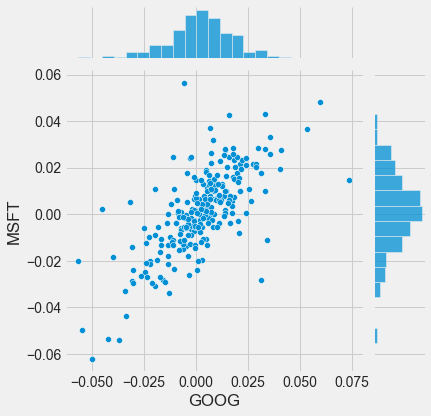

In [61]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

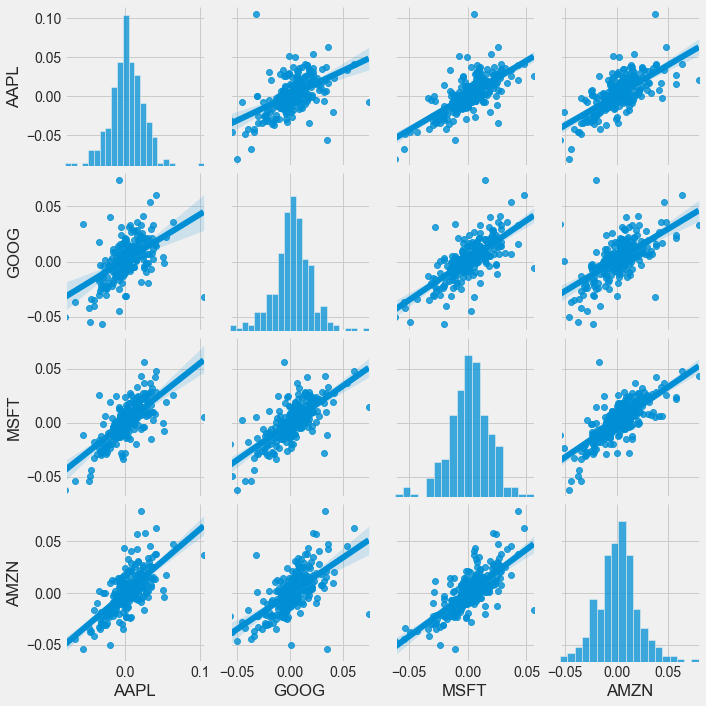

In [66]:
sns.pairplot(tech_rets, kind='reg')

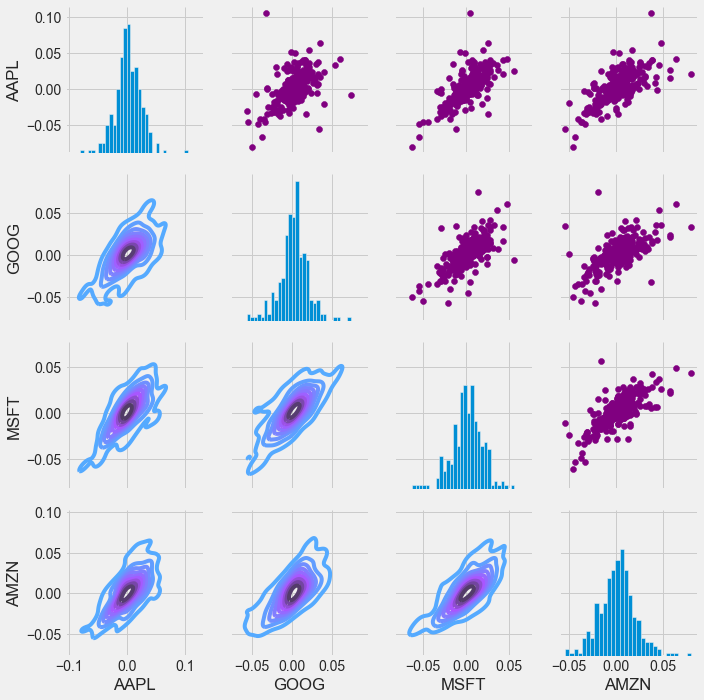

In [67]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

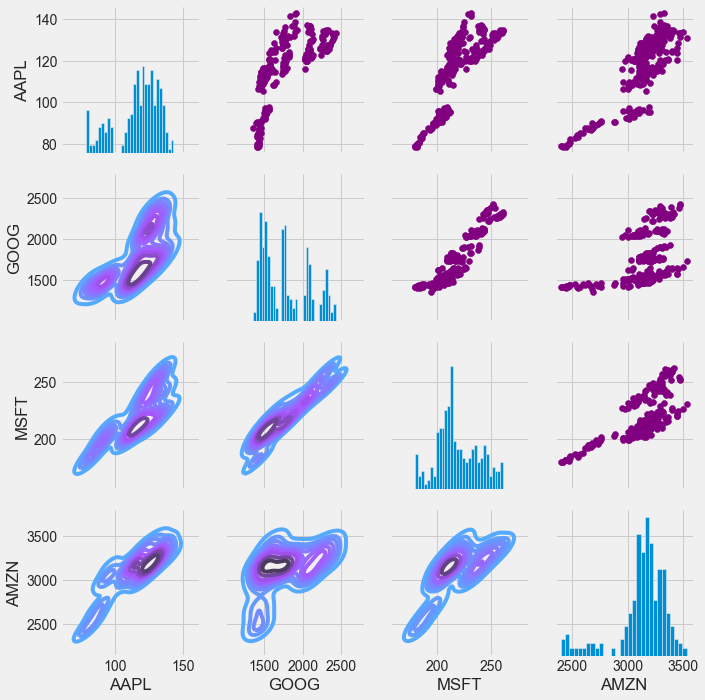

In [68]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

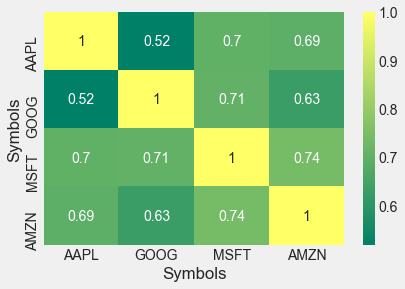

In [71]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

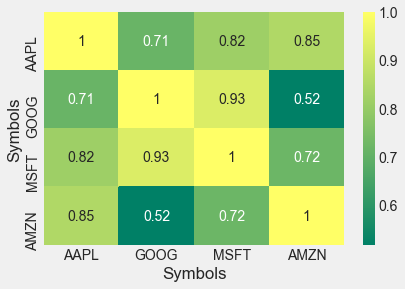

In [72]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

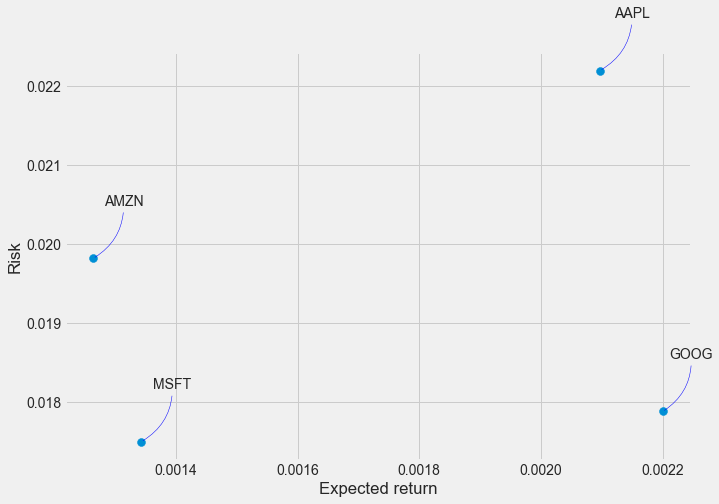

In [73]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [74]:
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2021-05-17,126.930000,125.169998,126.820000,126.269997,74244600.0,126.269997
2021-05-18,126.989998,124.779999,126.559998,124.849998,63342900.0,124.849998
2021-05-19,124.919998,122.860001,123.160004,124.690002,92612000.0,124.690002


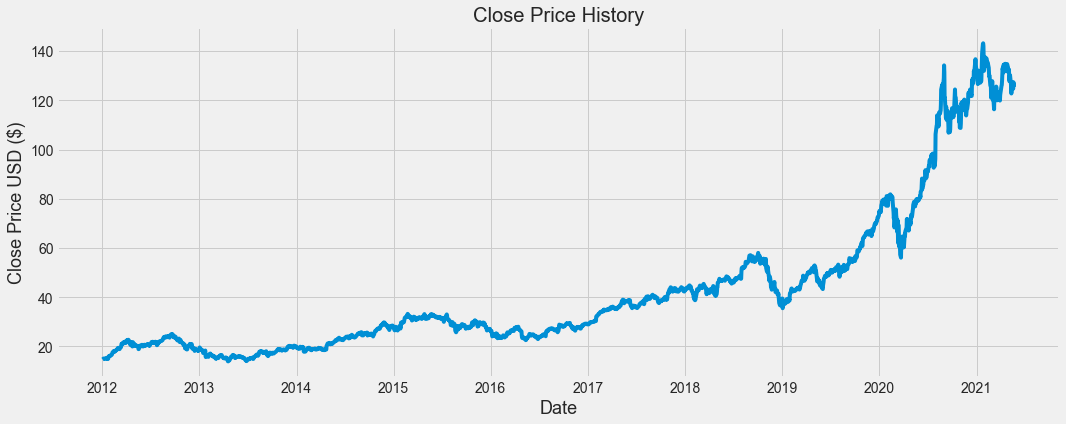

In [75]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [189]:
data = df[['Close']]
pred = 60
data['prediction']= df[['Close']].shift(-pred)
data

c:\users\home\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,prediction
Date,,
2012-01-03,14.686786,21.780714
2012-01-04,14.765714,21.412500
2012-01-05,14.929643,22.093929
2012-01-06,15.085714,22.475714
2012-01-09,15.061786,22.296785
...,...,...
2021-05-17,126.269997,NaN
2021-05-18,124.849998,NaN
2021-05-19,124.690002,NaN


In [190]:
X_val = data[['Close']].values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_transform = scaler.fit_transform(X_val)
X = X_transform[:-pred].reshape(-1,1)
X.shape

(2302, 1)

In [191]:
X_with_nan_output = X_transform[-pred:,0].reshape(-1,1)
X_with_nan_output.shape

(60, 1)

In [192]:
y = data['prediction']
y = y[:-pred]

In [193]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1841, 1) (1841,)
(461, 1) (461,)


In [194]:
X_test.shape

(461, 1)

Text(0, 0.5, 'Two month price')

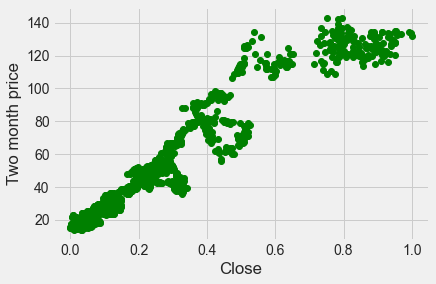

In [195]:
plt.plot(X,y,'go')
plt.xlabel('Close')
plt.ylabel('Two month price')

In [196]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf',C=1e3)
svr.fit(X_train,y_train)

SVR(C=1000.0)

In [197]:
svr.score(X_test,y_test) #r2_score

0.9396113369755654

In [198]:
y_predict = svr.predict(X_test)

In [199]:
from sklearn.metrics import r2_score
print('the r2_score is: ',r2_score(y_test,y_predict))

the r2_score is:  0.9396113369755654


In [200]:
y_predict.shape

(461,)

In [203]:
df_m = data[['Close']][-pred:]
df_m.shape

(60, 1)

In [230]:
y_m = svr.predict(X_with_nan_output)
df_m['Prdiction for next two months'] = y_m

In [234]:
# df_m.drop(columns=['Prdiction for next week'],inplace=True)
df_m.head()

,Close,Prdiction for next two months
Date,,
2021-02-26,121.260002,127.833910
2021-03-01,127.790001,125.233797
2021-03-02,125.120003,126.219940
2021-03-03,122.059998,127.530559
2021-03-04,120.129997,128.204982


In [235]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
features = poly.fit_transform(X_train)
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(features,y_train)

LinearRegression()

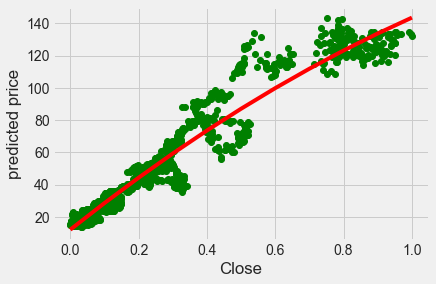

In [236]:
plt.plot(X,y,'go')
plt.xlabel('Close')
plt.ylabel('predicted price')
XX = np.arange(0.0,1.1,0.1)
yy = regr.intercept_+ regr.coef_[1]*XX+ regr.coef_[2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )

In [237]:
features_poly = poly.fit_transform(X_test)
y_predict_poly = regr.predict(features_poly)

In [238]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - y_predict_poly)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - y_predict_poly) ** 2))
print("R2-score: %.2f" % r2_score(y_test,y_predict_poly) )

Mean absolute error: 4.93
Residual sum of squares (MSE): 54.62
R2-score: 0.94


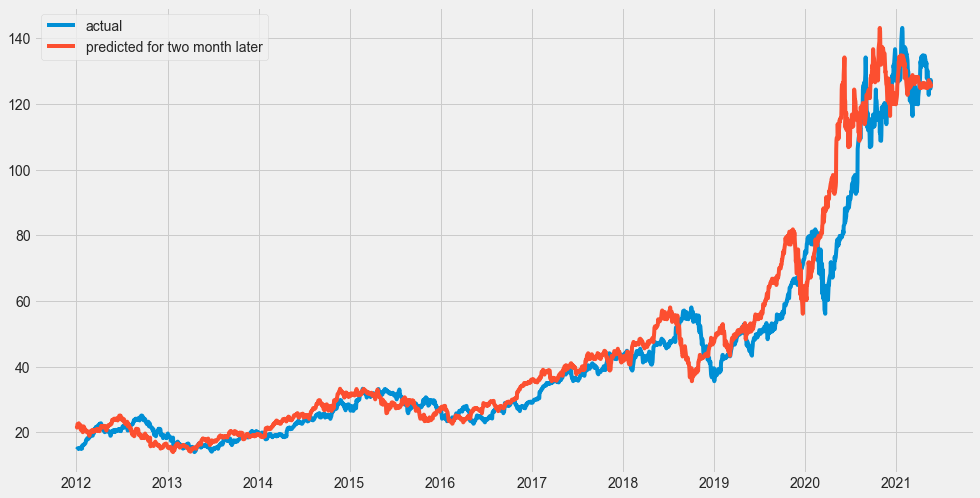

In [244]:
total_predict = pd.concat([data['prediction'],df_m['Prdiction for next two months']])
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(8)
fig.set_figwidth(15)

plt.plot(df['Close'],label='actual')
plt.plot(total_predict,label='predicted for two month later')
plt.legend()

In [ ]:
#nice